In [5]:
import os
import django
from django.db import connection
import sys
sys.path.append('../')
import pandas as pd
import matplotlib.pyplot as plt
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'activity_viewer.settings')
django.setup()

In [6]:
from dashboard.models import Log

In [7]:
times = Log.objects.filter(http_status=200).values_list('time')
times_df = pd.DataFrame(times, columns=['time'])
# Good idea to convert to pandas datetime from regular python datetime
times_df['time'] = pd.to_datetime(times_df['time'])

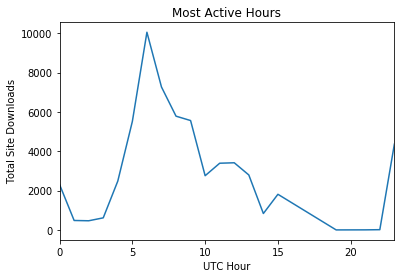

In [8]:
axes = times_df.groupby(by=times_df['time'].dt.hour).size().plot(kind='line')
# All log times are in UTC +0
axes.set(xlabel='UTC Hour', ylabel='Total Site Downloads', title='Most Active Hours')
plt.show()

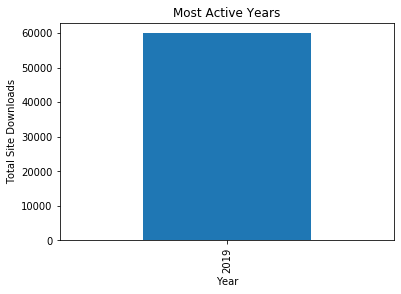

In [9]:
axes = times_df.groupby(by=times_df['time'].dt.year).size().plot(kind='bar')
axes.set(xlabel='Year', ylabel='Total Site Downloads', title='Most Active Years')
plt.show()

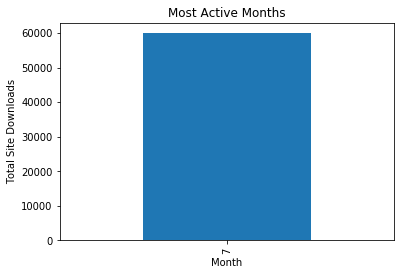

In [10]:
axes = times_df.groupby(by=times_df['time'].dt.month).size().plot(kind='bar')
axes.set(xlabel='Month', ylabel='Total Site Downloads', title='Most Active Months')
plt.show()
